## 导包

In [1]:
from IPython.core.interactiveshell import InteractiveShell 
InteractiveShell.ast_node_interactivity = 'all' #默认为'last'

import numpy as np
import pandas as pd
import os
import sympy 
from sympy import *
# from scipy import stats
# from sympy.abc import *
# from sympy import gamma
from matplotlib import pyplot as plt
%matplotlib inline
plt.rcParams['font.sans-serif']=['SimHei'] #指定默认字体 SimHei为黑体
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号
sympy.init_printing(use_latex=True)
x, y, z = symbols('x y z',real=True)

# 第六章 样本及抽样分布

### [exercises](Exercise_6.ipynb)

## 随机样本

## 直方图和箱线图

## 抽样分布

### 卡方分布(chi-square distribution)
$定义1:\chi^2分布\\
设X_1,...X_n是来自总体N(0,1)的样本，即X_1,...X_n相互独立且都服从标准正态分布，\\
则称统计量\chi^2=X_1^2+...+X_n^2，服从自由度为n的\chi^2分布\\
记为\chi^2\sim\chi^2(n)$  
***
$\chi^2(n)分布的概率密度为\\
f_n(x)=\begin{cases}\frac{1}{2^{\frac{n}{2}}\Gamma(\frac{n}{2})}x^{\frac{n}{2}-1}e^{-\frac{x}{2}},&x>0\\
0,& x\le 0\end{cases}$  
***
$\Gamma(\alpha,\theta)分布概率密度\Gamma(\alpha,\theta)\\
\begin{cases} \frac{1}{\theta^{\alpha} \Gamma\left(\alpha\right)}x^{\alpha - 1} e^{- \frac{x}{\theta}}, & x > 0 \\0, & x \le 0 \end{cases}$


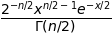

⎧ -n   n      -x            
⎪ ───  ─ - 1  ───           
⎪  2   2       2            
⎪2   ⋅x     ⋅ℯ              
⎪────────────────  for x > 0
⎨       ⎛n⎞                 
⎪      Γ⎜─⎟                 
⎪       ⎝2⎠                 
⎪                           
⎪       0          otherwise
⎩                           

\begin{cases} \frac{2^{- \frac{n}{2}} x^{\frac{n}{2} - 1} e^{- \frac{x}{2}}}{\Gamma\left(\frac{n}{2}\right)} & \text{for}\: x > 0 \\0 & \text{otherwise} \end{cases}


In [10]:
x,y,z=symbols('x y z',real=True)
n = symbols('n',positive=True,integer=True)
n1 = n/2
f_nx_ = (1/(2**(n1)*gamma(n1))*x**(n1-1)*exp(-x/2))
f_nx_
f_nx = Piecewise((f_nx_,x>0),(0,True))
f_nx
Integral(f_nx.subs(n,10),(x,0,oo)).doit()
print_latex(f_nx)

In [66]:
x,y,z=symbols('x y z',real=True)
alpha, theta= symbols('alpha,theta')
n = symbols('n',positive=True,integer=True)
n1 = n/2
f_nx_ = (1/(theta**(alpha)*gamma(alpha))*x**(alpha-1)*exp(-x/theta))
f_nx_
f_nx = Piecewise((f_nx_,x>0),(0,True))
f_nx
# Integral(f_nx.subs(n,10),(x,0,oo)).doit()
print_latex(f_nx)

⎧            -x            
⎪            ───           
⎪ -α  α - 1   θ            
⎪θ  ⋅x     ⋅ℯ              
⎨───────────────  for x > 0
⎪      Γ(α)                
⎪                          
⎪       0         otherwise
⎩                          

\begin{cases} \frac{\theta^{- \alpha} x^{\alpha - 1} e^{- \frac{x}{\theta}}}{\Gamma\left(\alpha\right)} & \text{for}\: x > 0 \\0 & \text{otherwise} \end{cases}


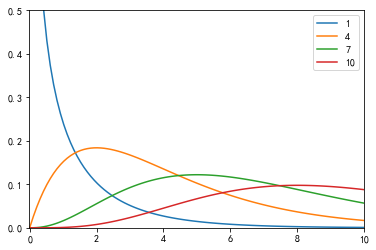

In [47]:
x1 = np.linspace(0.01,10,100)
for i in range(1,12,3):
    f1 = lambdify(x,f_nx_.subs({x:x1,n:i}))
    y1 = f1(x1)
    plt.plot(x1,y1,label=i)
    plt.xlim(-0.01,10)
    plt.ylim(0,0.5)
    plt.legend()

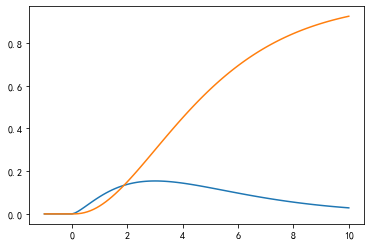

In [85]:
from scipy.stats import chi2
# Set up the sample range
x_chi2 = np.linspace(-1,10,100)
# Here set up the parameters for the normal distribution,
# where loc is the mean and scale is the standard deviation.
dist_chi2 = chi2(df=5)
# Retrieving norm's PDF and CDF
pdf_chi2 = dist_chi2.pdf(x_chi2) # 概率密度
cdf_chi2 = dist_chi2.cdf(x_chi2) # 分布函数
# pdf_chi2 = chi2.pdf(x_chi2,df=4)
# pdf_chi2
# cdf_chi2
# # Here we draw out 500 random values from the norm.
sample = dist_chi2.rvs(500)
# # sample
plt.plot(x_chi2, pdf_chi2)
plt.plot(x_chi2, cdf_chi2)
dist_chi2.expect() # 期望n
dist_chi2.var() # 方差np
dist_chi2.std() # 标准差
dist_chi2.ppf(0.95) # 下alpha分位点

In [96]:
from scipy.stats import chi2
#X<=3的概率密度之和
print("P(X<=3)={}".format(chi2.cdf(x=3,df=4)))
#2<X<=8的概率密度之和
print("P(2<X<=8)={}".format(chi2.cdf(x=8,df=4)))
chi2.cdf(x=2,df=4)
chi2.cdf(x=6,df=4)
chi2.cdf(x=8,df=4)
chi2.cdf(x=3,df=1)
chi2.cdf(x=3,df=3)
chi2.cdf(x=3,df=4)
a1 = chi2.ppf(q=0.9,df=25)
a2 = chi2.ppf(q=0.1,df=25)
a1,a2

P(X<=3)=0.4421745996289252
P(2<X<=8)=0.9084218055563291


#### 卡方分布的分位点
$对于一个数\alpha(0<\alpha<1),对于一个数c，\\
使得概率P\{\chi^2>c\}=\alpha \\
这个点c称为\chi^2(n)分布的上\alpha分位点，记为\chi^2_{\alpha}(n)\\
即\alpha=P\{\chi^2>\chi^2_{\alpha}(n)\}=\int_{\chi^2_{\alpha}}^{+\infty}f_n(x)dx$

### t分布  
$定义2:t分布\\
设X\sim N(0,1),Y\sim \chi^2(n)，且X,Y相互独立，\\
则称随机变量t=\frac{X}{\sqrt{Y/n}}\sim t(n)，服从自由度为n的t分布(学生氏分布)$ 
***
$t分布的概率密度为\\
f(x)=\frac{\Gamma[(n+1)/2]}{\sqrt{\pi n}\Gamma(n/2)}(1+\frac{t^2}{n})^{-\frac{(n+1)}{2}}
$
***
$t分布的典型模式\\
设X\sim N(0,1)，Y\sim \chi^2(n)，且X,Y相互独立，则\frac{X}{\sqrt{Y/n}}\sim t(n) \\
t分布的应用模式\\
设X,Y_1,...Y_n相互独立且都服从N(0,1),则\frac{X}{\sqrt{\frac{Y_1^2+...+Y_n^2}{n}}}\sim t(n)
$

In [111]:
from scipy.stats import t as td
td.cdf(x=1,df=20)

In [125]:
td.ppf(q=0.5,df=5)

### F分布  
$定义3:F分布\\
设U\sim \chi^2(n_1),V\sim \chi^2(n_2)，且U,V相互独立，\\
则称随机变量F=\frac{U/n_1}{V/n_2}\sim t(n)，服从自由度为(n_1,n2)的F分布$  
***
$F分布的概率密度为\\
f_n(x)=\begin{cases}\frac{\Gamma[(n_1+n_2)/2](n_1/n_2)^{n_1/2}x^{(n_1/2)-1}}{\Gamma(n_1/2)\Gamma(n_2/2)[1+(n_1x/n_2)]^{(n_1+n_2)/2}} \\
0,& x\le 0\end{cases}  
$

In [112]:
from scipy.stats import f as fd
fd.cdf(1,20,dfd=10)

$F_{1-\alpha}(n_1,n_2)=\frac{1}{F_{\alpha}(n_2,n_1)}$

In [128]:
fd.ppf(q=0.95,dfn=15,dfd=6)
1/fd.ppf(q=0.05,dfn=6,dfd=15)

### 正态总体的样本均值和样本方差的分布  
$设有总体X(不管服从什么分布，只要数学期望E(X)和方差D(X)都存在)。\\
设数学期望(均值)E(X)=\mu，方差D(X)=\sigma^2。X_1,X_2,...X_n是来自总体X的一个样本,样本均值和样本方差分别为\\
\bar{X}=\frac{1}{n}\sum_{i=1}^{n}X_i,\ S^2=\frac{1}{n-1}\sum_{i=1}^{n}(X_i-\bar{X})^2=\frac{1}{n-1}(\sum_{i=1}^{n}X_i^2-n\bar{X}^2)$

#### 命题1  
$设有总体，设其数学期望E(X)=\mu，X_1,X_2,...X_n是来自总体X的一个样本，则\\
(1)\ E(\bar{X})=\mu=E(X)\\
(2)\ D(\bar{X})=\frac{\sigma^2}{n}=\frac{D(X)}{n}\\
(3)\ E(S^2)=\sigma^2=D(X)$

#### 定理一(正态总体的样本均值的分布)
$X_1,X_2,...X_n是来自正态总体N(\mu,\sigma^2)的一个样本，则\\
\bar{X}\sim N(\mu,\frac{\sigma^2}{n})\\
标准化后，得：\frac{\bar{X}-\mu}{\sigma/\sqrt{n}}\sim N(0,1)\\
当n较大时，样本均值比总体更加集中在\mu附近$

#### 定理二(正态总体的样本方差的分布)
$X_1,X_2,...X_n是来自正态总体N(\mu,\sigma^2)的一个样本，则\\
(1)\ \frac{(n-1)S^2}{\sigma^2}\sim \chi^2(n-1)\\
(2)\ \bar{X}与S^2相互独立\\
几个等价写法\\
\frac{1}{\sigma^2}\sum_{i=1}^{n}(X_i-\bar{X})^2\sim \chi^2(n-1)\\
\sum_{i=1}^{n}(\frac{X_i-\bar{X}}{\sigma})^2\sim \chi^2(n-1)$

#### 定理三(正态总体的样本均值与样本方差的分布)
$X_1,X_2,...X_n是来自正态总体N(\mu,\sigma^2)的一个样本，则\\
\frac{\bar{X}-\mu}{S/\sqrt{n}}\sim t(n-1)$

### 两个正态总体的样本均值与样本方差的分布   


#### 命题
$设X_1,X_2,...X_n和Y_1,Y_2,...Y_n是来自正态总体N(\mu_1,\sigma_1^2)和N(\mu_1,\sigma_1^2)的样本，且这两个样本相互独立，则\\
\frac{\frac{1}{n_1\sigma_1^2}\sum_{i=1}^{n_1}(X_i-\mu_1)^2}{\frac{1}{n_2\sigma_2^2}\sum_{i=1}^{n_1}(Y_i-\mu_2)^2}\sim F(n_1,n_2)$

#### 定理四(两个正态总体的样本均值与样本方差的分布 )
$设X_1,X_2,...X_n和Y_1,Y_2,...Y_n是来自正态总体N(\mu_1,\sigma_1^2)和N(\mu_1,\sigma_1^2)的样本，且这两个样本相互独立，则有\\
(1)\ \frac{S_1^2/\sigma_1^2}{S_2^2/\sigma_2^2}\sim F(n_1-1,n_2-1)\\
推论：若\sigma_1^2=\sigma_2^2，则\frac{S_1^2}{S_2^2}\sim F(n_1-1,n_2-1)\\
(2)\ \bar{X}\pm \bar{Y}\sim N(\mu_1\pm \mu_2,\frac{\sigma_1^2}{n_1}+\frac{\sigma_2^2}{n_2})\\
标准化后，有：\frac{\bar{X}\pm \bar{Y}-(\mu_1\pm \mu_2)}{\sqrt{\frac{\sigma_1^2}{n_1}+\frac{\sigma_2^2}{n_2}}}\sim N(0,1)\\
(3)\ 若\sigma_1^2=\sigma_2^2，则：\frac{\bar{X}-\bar{Y}-(\mu_1-\mu_2)}{S_w\sqrt{\frac{1}{n_1}+\frac{1}{n_2}}}\sim t(n_1+n_2-2)\\
S_w=\sqrt{\frac{(n_1-1)S_1^2+(n_2-1)S_2^2}{n_1+n_2-2}}$

# 第七章 参数估计

### [exercises](Exercise_7.ipynb)

## 点估计

### 定义(点估计Point Estimation)  
$设总体X的分布函数F(x;\theta)的形式(类型)已知，\theta是未知参数。\\
从总体X中抽取样本X_1,X_2,...X_n构造某个统计量\hat \theta(X_1,X_2,...X_n)，作为对未知参数\theta的估计，称为\theta的点估计量。\\
将相应的观察值x_1,x_2,...x_n代入，得\hat \theta(x_1,x_2,...x_n)，称为\theta的点估计值。\\
估计量和估计值统称估计。
$

#### 两种常用的构造统计量的方法  
1. 矩估计法
2. 最大似然估计法

### 矩估计法

#### 矩估计法的具体做法
$设X为连续型随机变量，其概率密度为f(x;\theta_1,\theta_2,...\theta_k)\\
或X为离散型随机变量，其分布律为P\{X=x\}=p(x;\theta_1,\theta_2,...\theta_k)\\
其中\theta_1,\theta_2,...\theta_k为待估参数，X_,X_2,...X_n为来自总体的样本。\\
(1) \ 计算总体X的1\sim k阶矩，得方程组\\
(2) \ 从方程组中解出未知参数\\
(3) \ 用样本矩A_l分别代替总体矩\mu_l，得参数的矩估计量$


## 基于截尾样本的最大似然估计

## 估计量的评选标准

## 区间估计

$求参数\theta的置信区间的步骤\\
(1)对总体的样本X_1,X_2,...,X_n，取一个\theta的点估计量(最好是无偏的)\hat\theta=\hat\theta(X_1,X_2,...,X_n)\\
(2)从估计量\hat\theta出发，构造一个函数W=W(X_1,X_2,...,X_n;\theta)\\
W的分布已知，其中只含唯一的未知参数\theta，W的分位点可以查表得到\\
(3)对于给定的置信水平1-\alpha，求a和b，使得\\
P\{a<W<b\}=1-\alpha\ (a和b通常是W的分位点)\\
从不等式a<W(X_1,X_2,...,X_n;\theta)<b\\
解出等价的不等式\underline\theta<\theta<\overline\theta\\
得置信区间：(\underline\theta,\overline\theta)$

## 正态总体均值与方差的区间估计

### 一个正态总体的情形

$(1)设总体X\sim N(\mu,\sigma^2)，总体方差\sigma^2已知，总体均值\mu未知。\\X_1,X_2,...X_n是来自总体X的样本，求\mu的置信水平为1-\alpha的置信区间\\
(\overline{X}-\frac{\sigma}{\sqrt{n}}z_{\alpha/2},\overline{X}+\frac{\sigma}{\sqrt{n}}z_{\alpha/2})\\
简写为(\overline{X}\pm\frac{\sigma}{\sqrt{n}}z_{\alpha/2})$

$(2)设总体X\sim N(\mu,\sigma^2)，总体方差\sigma^2和均值\mu未知。\\
X_1,X_2,...X_n是来自总体X的样本，求\mu的置信水平为1-\alpha的置信区间\\
(\overline{X}-\frac{S}{\sqrt{n}}t_{\alpha/2}(n-1),\overline{X}+\frac{S}{\sqrt{n}}t_{\alpha/2}(n-1))\\
简写为(\overline{X}\pm\frac{S}{\sqrt{n}}t_{\alpha/2}(n-1))$

$(3)设总体X\sim N(\mu,\sigma^2)，总体方差\sigma^2和均值\mu未知。\\
X_1,X_2,...X_n是来自总体X的样本，求\sigma^2的置信水平为1-\alpha的置信区间\\
(\frac{(n-1)S^2}{\chi_{\alpha/2}^2(n-1)},\frac{(n-1)S^2}{\chi_{\alpha/2}^2(n-1)})
$

### 两个正态总体的情形

#### 两个正态总体均值差的区间估计

$(1)有两个正态总体：X\sim N(\mu_1,\sigma_1^2),Y\sim N(\mu_2,\sigma_2^2)，其中方差\sigma_1^2,\sigma_2^2已知\\
设样本X_1,X_2,...X_n来自样本X，Y_1,Y_2,...Y_n来自样本Y，这两个样本相互独立。\\
设\overline X,S_1^2和\overline Y,S_2^2分别是两个样本的样本均值和样本方差，\\
求均值差\mu_1-\mu_2的置信水平为1-\alpha的置信区间\\
(\overline X-\overline Y-z_{\alpha/2}\sqrt{\frac{\sigma_1^2}{n_1}+\frac{\sigma_2^2}{n_2}},\overline X-\overline Y+z_{\alpha/2}\sqrt{\frac{\sigma_1^2}{n_1}+\frac{\sigma_2^2}{n_2}})\\
简记为(\overline X-\overline Y\pm z_{\alpha/2}\sqrt{\frac{\sigma_1^2}{n_1}+\frac{\sigma_2^2}{n_2}})$

$(2)有两个正态总体：X\sim N(\mu_1,\sigma_1^2),Y\sim N(\mu_2,\sigma_2^2)，其中方差\sigma_1^2=\sigma_2^2=\sigma^2未知\\
设样本X_1,X_2,...X_n来自样本X，Y_1,Y_2,...Y_n来自样本Y，这两个样本相互独立。\\
设\overline X,S_1^2和\overline Y,S_2^2分别是两个样本的样本均值和样本方差，\\
求均值差\mu_1-\mu_2的置信水平为1-\alpha的置信区间\\
(\overline X-\overline Y\pm t_{\alpha/2}(n_1+n_2-2)S_w\sqrt{\frac{1}{n_1}+\frac{1}{n_2}})$

#### 两个正态总体方差比的区间估计

$(2)有两个正态总体：X\sim N(\mu_1,\sigma_1^2),Y\sim N(\mu_2,\sigma_2^2)，其中方差\sigma_1^2=\sigma_2^2=\sigma^2未知\\
设样本X_1,X_2,...X_n来自样本X，Y_1,Y_2,...Y_n来自样本Y，这两个样本相互独立。\\
设\overline X,S_1^2和\overline Y,S_2^2分别是两个样本的样本均值和样本方差，\\
求方差比\sigma_1^2/\sigma_2^2的置信水平为1-\alpha的置信区间\\
(\frac{S_1^2}{S_2^2}\frac{1}{F_{\alpha/2}(n_1-1,n_2-1)},\frac{S_1^2}{S_2^2}\frac{1}{F_{1-\alpha/2}(n_1-1,n_2-1)})$

## 0-1分布参数的区间估计

$$

$$

$$

## 单侧置信区间

$$

$$

# 第八章 假设检验

### [exercises](Exercise_8.ipynb)

## 假设检验

### 假设检验的基本思想

### 假设检验的三种提法（设$\theta_0$为已知常数）
1. 双侧检验：$H_0:\theta=\theta_0,H_0:\theta\neq \theta_0$
2. 单侧检验：$H_0:\theta\le \theta_0,H_1:\theta> \theta_0\ 或H_0:\theta\ge \theta_0,H_1:\theta< \theta_0$
3. (2)的替代提法：$H_0:\theta= \theta_0,H_1:\theta> \theta_0\ 或H_0:\theta= \theta_0,H_1:\theta< \theta_0$


### 假设检验的两类错误
1. 弃真
    * 显著性水平$\alpha$
2. 取伪

### 假设检验的步骤
$设未知参数为\theta，显著性水平为\alpha，X_1,X_2,...,X_n为来自总体X的样本。对原假设H_0:\theta=\theta_0(\theta_0是已知常数)，\\我们用以下步骤进行关于假设H_0的检验（主要是确定H_0的拒绝域W）$  
1. 取一个未知参数的较优的点估计量（最好是无偏估计量）$\hat \theta=\hat \theta(X_1,X_2,...,X_n)$
2. $从\hat \theta出发，构造一个检验统计量U=U(X_1,X_2,...,X_n,\theta,\hat \theta),\\
使得当\theta=\theta_0时，U的分布是已知的，且可以查表得到U的分位点$
3. $对给定的检验水平\alpha，查表得出U的分位点，并结合H_0的意义求出H_0的拒绝域W,\\
使得\theta=\theta_0时，有P\{U\in W|H_0为真\}=\alpha,即P\{拒绝H_0|H_0为真\}=\alpha$ 
4. $代入样本观测值x_1,x_2,...x_n，计算U的值u。\\
若u\in W,则拒绝假设H_0:\theta=\theta_0，接受H_1\\
若u\notin W,则接受假设H_0:\theta=\theta_0$

## 正态总体均值的假设检验

### 单个总体均值的假设检验

#### Z检验
$正态总体N(\mu,\sigma^2)均值\mu的假设检验(Z检验)(已知方差，显著性水平为\alpha)\\
检验统计量及其分布Z=\frac{\overline{X}-\mu_0}{\sigma/\sqrt{n}}\sim N(0,1)$  

$原假设H_0$|$备择假设H_1$|$H_0的拒绝域$
:---:|:---:|:---:
$\mu=\mu_0$|$\mu\neq\mu_0$|$|z|\ge z_{\alpha/2}$
$\mu\le\mu_0$|$\mu>\mu_0$|$z\ge z_{\alpha}$
$\mu\ge\mu_0$|$\mu<\mu_0$|$z\le -z_{\alpha}$


#### t检验
$正态总体N(\mu,\sigma^2)均值\mu的假设检验(t检验)(方差未知，显著性水平为\alpha)\\
检验统计量及其分布T=\frac{\overline{X}-\mu_0}{S/\sqrt{n}}\sim t(n-1)$  

$原假设H_0$|$备择假设H_1$|$H_0的拒绝域$
:---:|:---:|:---:
$\mu=\mu_0$|$\mu\neq\mu_0$|$|t|\ge t_{\alpha/2}(n-1)$
$\mu\le\mu_0$|$\mu>\mu_0$|$t\ge t_{\alpha}(n-1)$
$\mu\ge\mu_0$|$\mu<\mu_0$|$t\le -t_{\alpha}(n-1)$


### 两个正态总体均值的假设检验

#### Z检验
$比较两个正态总体N(\mu_1,\sigma_1^2)，N(\mu_2,\sigma_2^2)均值的假设检验(Z检验，\delta为常数)(已知方差，显著性水平为\alpha)\\
检验统计量及其分布Z=\frac{\overline{X}-\overline{Y}-\delta}{\sqrt{\frac{\sigma_1^2}{n_1}+\frac{\sigma_2^2}{n_2}}}\sim N(0,1)$  

$原假设H_0$|$备择假设H_1$|$H_0的拒绝域$
:---:|:---:|:---:
$\mu_1-\mu_2=\delta$|$\mu_1-\mu_2=\delta$|$|z|\ge z_{\alpha/2}$
$\mu_1-\mu_2\le \delta$|$\mu_1-\mu_2>\delta$|$z\ge z_{\alpha}$
$\mu_1-\mu_2\ge \delta$|$\mu_1-\mu_2<\delta$|$z\le -z_{\alpha}$


#### t检验
$比较两个正态总体N(\mu_1,\sigma_1^2)，N(\mu_2,\sigma_2^2)均值的假设检验(Z检验，\delta为常数)(方差未知但相等，显著性水平为\alpha)\\
检验统计量及其分布T=\frac{\overline{X}-\overline{Y}-\delta}{S_w\sqrt{\frac{1}{n_1}+\frac{1}{n_2}}}\sim t(n_1+n_2-2) \\
S_w=\sqrt{\frac{(n_1-1)S_1^2+(n_2-1)S_2^2}{n_1+n_2-2}}$  

$原假设H_0$|$备择假设H_1$|$H_0的拒绝域$
:---:|:---:|:---:
$\mu_1-\mu_2=\delta$|$\mu_1-\mu_2=\delta$|$|t|\ge t_{\alpha/2}(n_1+n_2-2)$
$\mu_1-\mu_2\le \delta$|$\mu_1-\mu_2>\delta$|$t\ge t_{\alpha}(n_1+n_2-2)$
$\mu_1-\mu_2\ge \delta$|$\mu_1-\mu_2<\delta$|$t\le -t_{\alpha}(n_1+n_2-2)$


## 正态总体方差的假设检验  
1. $总体N(\mu,\sigma^2)，\sigma^2已知，关于\mu的假设检验(Z检验)$
2. $总体N(\mu,\sigma^2)，\sigma^2未知，关于\mu的假设检验(t检验)$

### 单个正态总体方差的假设检验

#### $\chi^2$检验
$正态总体N(\mu,\sigma^2)均值\sigma的假设检验(\chi^2检验)(总体均值未知，显著性水平为\alpha)\\
检验统计量及其分布\chi^2=\frac{(n-1)S^2}{\sigma_0^2}\sim \chi^2(n-1)$  

$原假设H_0$|$备择假设H_1$|$H_0的拒绝域$
:---:|:---:|:---:
$\sigma^2=\sigma^2_0$|$\sigma^2\neq\sigma^2_0$|$\chi^2\ge \chi^2_{\alpha/2}(n-1)\\ or\ \chi^2\le \chi^2_{1-\alpha/2}(n-1)$
$\sigma^2\le\sigma^2_0$|$\sigma^2>\sigma^2_0$|$\chi^2\ge \chi^2_{\alpha}(n-1)$
$\sigma^2\ge\sigma^2_0$|$\sigma^2<\sigma^2_0$|$\chi^2\le \chi^2_{1-\alpha}(n-1)$  



$正态总体N(\mu,\sigma^2)均值\sigma的假设检验(\chi^2检验)(总体均值\mu已知，显著性水平为\alpha)\\
检验统计量及其分布\chi^2=\frac{\sum_{i=1}^n(X_i-\mu)^2}{\sigma_0^2}\sim \chi^2(n)$  

$原假设H_0$|$备择假设H_1$|$H_0的拒绝域$
:---:|:---:|:---:
$\sigma^2=\sigma^2_0$|$\sigma^2\neq\sigma^2_0$|$\chi^2\ge \chi^2_{\alpha/2}(n)\\ or\ \chi^2\le \chi^2_{1-\alpha/2}(n)$
$\sigma^2\le\sigma^2_0$|$\sigma^2>\sigma^2_0$|$\chi^2\ge \chi^2_{\alpha}(n)$
$\sigma^2\ge\sigma^2_0$|$\sigma^2<\sigma^2_0$|$\chi^2\le \chi^2_{1-\alpha}(n)$  

### 两个正态总体方差的假设检验

#### F检验
$比较两个正态总体方差的假设检验(F检验)(总体均值未知，显著性水平为\alpha)\\
检验统计量及其分布F=\frac{S_1^2}{S_2^2}\sim F(n_1-1,n_2-1)$  

$原假设H_0$|$备择假设H_1$|$H_0的拒绝域$
:---:|:---:|:---:
$\sigma_1=\sigma_2$|$\sigma_1\neq \sigma_2$|$F\ge F_{\alpha/2}(n_1-1,n_2-1) \\ or\ F\le F_{1-\alpha/2}(n_1-1,n_2-1)$
$\sigma_1\le \sigma_2$|$\sigma_1>\sigma_2$|$F\ge F_{\alpha}(n_1-1,n_2-1)$
$\sigma_1\ge \sigma_2$|$\sigma_1<\sigma_2$|$F\le -F_{\alpha}(n_1-1,n_2-1)$


$比较两个正态总体方差的假设检验(F检验)(总体均值\mu_1,\mu_2已知，显著性水平为\alpha)\\
检验统计量及其分布F=\frac{\frac{1}{n_1}\sum_{i=1}^n(X_i-\mu_1)^2}{\frac{1}{n_2}\sum_{i=1}^n(X_i-\mu_2)^2}\sim F(n_1,n_2)$  
 

$原假设H_0$|$备择假设H_1$|$H_0的拒绝域$
:---:|:---:|:---:
$\sigma^2=\sigma^2_0$|$\sigma^2\neq\sigma^2_0$|$F\ge F_{\alpha/2}(n_1,n_2)\\ or\ F\le F_{1-\alpha/2}(n_1,n_2)$
$\sigma^2\le\sigma^2_0$|$\sigma^2>\sigma^2_0$|$F\ge F_{\alpha}(n_1,n_2)$
$\sigma^2\ge\sigma^2_0$|$\sigma^2<\sigma^2_0$|$F\le F_{1-\alpha}(n_1,n_2)$  

## 分布拟合检验

### 皮尔逊定理  
$若n充分大(n\ge 50)，则当H_0为真时，无论总体服从何种分布，\\
统计量\chi_2=\sum_{i=1}^{k}\frac{n}{p_i}(\frac{n_i}{n}-p_i)^2=\sum_{i=1}^{k}\frac{(n_i-np_i)^2}{np_i}\\
都近似服从\chi^2(k-r-1)$

# 方差分析及回归分析

In [20]:
a1 = np.random.randn(1000000)
a1 = a1
# a1 = np.array([1,2,3,4,5])
e1 = np.mean(a1)
e1
np.std(a1)
np.std(a1,ddof=4)
s1 = ((a1-e1)**5/1000000).sum()
np.mean(a1**5)
s2 = ((a1-e1)**2/9996).sum()
sqrt(s1)
sqrt(s2)

In [15]:
help(np.std)

Help on function std in module numpy:

std(a, axis=None, dtype=None, out=None, ddof=0, keepdims=<no value>)
    Compute the standard deviation along the specified axis.
    
    Returns the standard deviation, a measure of the spread of a distribution,
    of the array elements. The standard deviation is computed for the
    flattened array by default, otherwise over the specified axis.
    
    Parameters
    ----------
    a : array_like
        Calculate the standard deviation of these values.
    axis : None or int or tuple of ints, optional
        Axis or axes along which the standard deviation is computed. The
        default is to compute the standard deviation of the flattened array.
    
        .. versionadded:: 1.7.0
    
        If this is a tuple of ints, a standard deviation is performed over
        multiple axes, instead of a single axis or all the axes as before.
    dtype : dtype, optional
        Type to use in computing the standard deviation. For arrays of
       

In [21]:
help(np.random.randn)

Help on built-in function randn:

randn(...) method of mtrand.RandomState instance
    randn(d0, d1, ..., dn)
    
    Return a sample (or samples) from the "standard normal" distribution.
    
    If positive, int_like or int-convertible arguments are provided,
    `randn` generates an array of shape ``(d0, d1, ..., dn)``, filled
    with random floats sampled from a univariate "normal" (Gaussian)
    distribution of mean 0 and variance 1 (if any of the :math:`d_i` are
    floats, they are first converted to integers by truncation). A single
    float randomly sampled from the distribution is returned if no
    argument is provided.
    
    This is a convenience function.  If you want an interface that takes a
    tuple as the first argument, use `numpy.random.standard_normal` instead.
    
    Parameters
    ----------
    d0, d1, ..., dn : int, optional
        The dimensions of the returned array, should be all positive.
        If no argument is given a single Python float is ret

In [18]:
# %pylab
%matplotlib inline

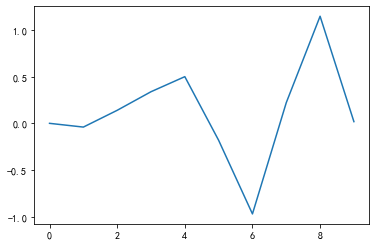

In [19]:
# %matplotlib qt5
a1 = np.linspace(0,1,10)*np.random.randn(10)
#     plt.clf()
plt.plot(a1)
#     plt.show()

In [13]:
# %matplotlib qt5
for i in range(10):
    a1 = np.linspace(0,1,10)*np.random.randn(10)
#     plt.clf()
    plt.plot(a1)
    plt.show()

In [2]:
%run test01.py

tensor([[-0.2381, -0.4906, -0.5166],
        [ 0.3913,  0.0464,  1.9670],
        [-1.4385,  0.8276,  0.3118]])
tensor([[-0.0306,  0.2907,  0.5356],
        [ 0.4138,  1.6000, -1.0613],
        [ 1.2857,  0.0550,  0.6712]])


# end